In [ ]:
# Import Modul Jcopml
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32194 sha256=234ce92368c7b0cec9542c11fd0d5c49d10799602b240dda9cb6b23196da37fd
  Stored in directory: /root/.cache/pip/wheels/a6/1c/91/32f7a6b0a9d6bbcef17a7fc0d065f9a9b8d9904551b377b64d
Successfully built jcopml


In [ ]:
# Import Library
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from string import punctuation

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_indo = stopwords.words("indonesian") + list(punctuation)

In [ ]:
# Import Data
df = pd.read_excel("Hasil_Labeling_Asli.xlsx")
df

,Stemming,sentimen
0,pikir hokky kerja usaha story terima kasih gan...,Netral
1,koster amp ganjar maaf play victim mega perint...,Negatif
2,pro alas ganjar,Netral
3,ganjar hebat ya anja,Positif
4,ganjar pranowo adaada,Positif
...,...,...
3008,gue ebong gue dukung ganjar gue ganjar preside...,Positif
3009,gara ti sepakbola negeri bikin ganjar gibran p...,Negatif
3010,kasihan erik tohir loby fifa pildun indonesia ...,Negatif
3011,kecewa berat ganjar timnas israel nitizen huku...,Negatif


In [ ]:
# Hapus Data Duplikat
df.drop_duplicates(subset=["Stemming"], keep="first", inplace=True)
df

,Stemming,sentimen
0,pikir hokky kerja usaha story terima kasih gan...,Netral
1,koster amp ganjar maaf play victim mega perint...,Negatif
2,pro alas ganjar,Netral
3,ganjar hebat ya anja,Positif
4,ganjar pranowo adaada,Positif
...,...,...
3008,gue ebong gue dukung ganjar gue ganjar preside...,Positif
3009,gara ti sepakbola negeri bikin ganjar gibran p...,Negatif
3010,kasihan erik tohir loby fifa pildun indonesia ...,Negatif
3011,kecewa berat ganjar timnas israel nitizen huku...,Negatif


In [ ]:
# menghapus kolom dengan nilai missing
df.dropna(inplace=True)
df

,Stemming,sentimen
0,pikir hokky kerja usaha story terima kasih gan...,Netral
1,koster amp ganjar maaf play victim mega perint...,Negatif
2,pro alas ganjar,Netral
3,ganjar hebat ya anja,Positif
4,ganjar pranowo adaada,Positif
...,...,...
3008,gue ebong gue dukung ganjar gue ganjar preside...,Positif
3009,gara ti sepakbola negeri bikin ganjar gibran p...,Negatif
3010,kasihan erik tohir loby fifa pildun indonesia ...,Negatif
3011,kecewa berat ganjar timnas israel nitizen huku...,Negatif


In [ ]:
# menghitung jumlah sentimen positif, negatif
jumlah_positif = len(df[df['sentimen'] == 'Positif'])
jumlah_netral = len(df[df['sentimen'] == 'Netral'])
jumlah_negatif = len(df[df['sentimen'] == 'Negatif'])

print("Jumlah Sentiment Positif:", jumlah_positif)
print("Jumlah Sentiment Netral:", jumlah_netral)
print("Jumlah Sentiment Negatif:", jumlah_negatif)

Jumlah Sentiment Positif: 1175
Jumlah Sentiment Netral: 1149
Jumlah Sentiment Negatif: 687


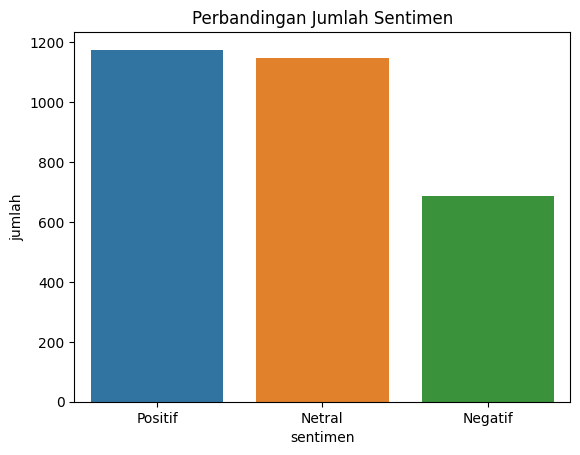

In [ ]:
# membuat dataframe untuk data jumlah sentimen
df1 = pd.DataFrame({'sentimen': ['Positif', 'Netral', 'Negatif'],
                   'jumlah': [jumlah_positif, jumlah_netral, jumlah_negatif]})

# membuat grafik bar menggunakan seaborn
sns.barplot(x='sentimen', y='jumlah', data=df1)

# menambahkan judul pada grafik
plt.title('Perbandingan Jumlah Sentimen')
#plt.savefig("grafik bar perbandingan sentimen.png")
# menampilkan grafik
plt.show()


In [ ]:
# Membuat Grafik persentase
fig = px.pie(df, names='sentimen', title = 'Persentase Label Sentiment')
fig.update_layout(title={'x':0.5, 'y':0.95, 'xanchor':'center', 'yanchor':'top'})
fig.show()

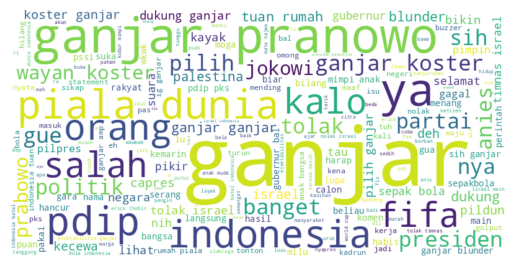

In [ ]:
# Membuat dataframe dari file excel
df1 = pd.read_excel('Hasil_Labeling_Asli.xlsx')

# Menghapus nilai float pada kolom teks
df1 = df1[pd.notnull(df1['Stemming'])]

# Menggabungkan semua teks menjadi satu string
text = " ".join(review for review in df1.Stemming)

# Membuat objek wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("wordcloud ganjar pranowo_asli.png")
plt.show()

In [ ]:
df.sentimen.value_counts()

Positif    1175
Netral     1149
Negatif     687
Name: sentimen, dtype: int64

In [ ]:
class_pos,class_net,class_neg= df.sentimen.value_counts()
c_pos = df[df['sentimen'] == 'Positif']
c_net = df[df['sentimen'] == 'Netral']
c_neg = df[df['sentimen'] == 'Negatif']
class_pos1 = c_pos.sample(class_neg, replace=True)
class_net1 = c_net.sample(class_neg, replace=True)

undersampled_df = pd.concat([class_pos1,class_net1,c_neg],axis=0)
undersampled_df.sentimen.value_counts()

Positif    687
Netral     687
Negatif    687
Name: sentimen, dtype: int64

### Split Data

In [ ]:
X = undersampled_df.Stemming
y = undersampled_df.sentimen

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1854,), (207,), (1854,), (207,))

In [ ]:
from sklearn.svm import SVC

In [ ]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer()),
    ('algo', SVC(max_iter=500,probability=True))
])


model = GridSearchCV(pipeline, gsp.svm_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
{'algo__C': 1.0, 'algo__gamma': 1.0}
0.9929881337648327 0.6644860493917097 0.6618357487922706


In [ ]:
from jcopml.plot import plot_confusion_matrix,plot_classification_report,plot_roc_curve

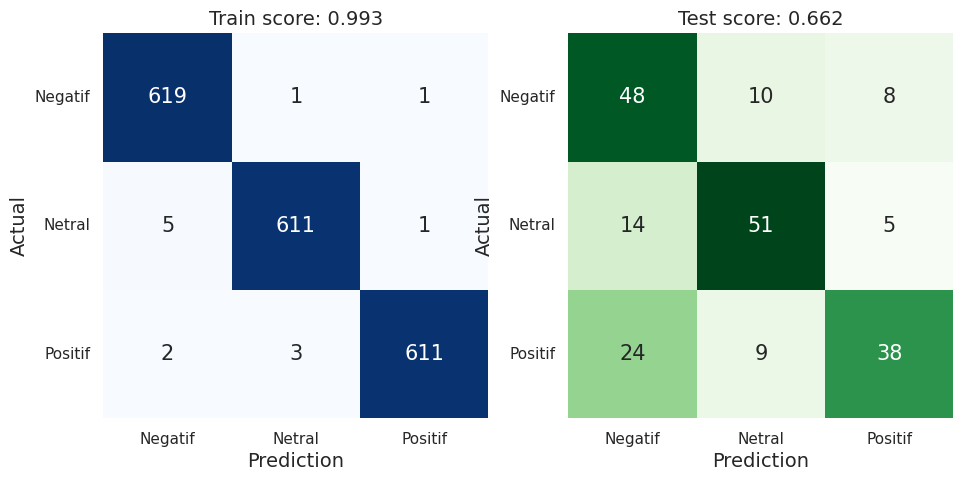

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

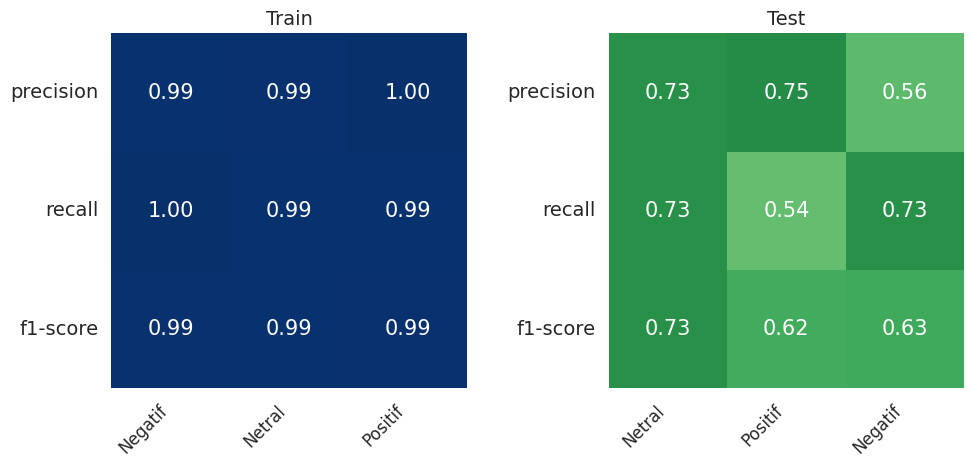

In [ ]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [ ]:
# Prediksi Model
prediction_svm = model.predict(X_test)
prediction_svm

array(['Netral', 'Positif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Netral', 'Netral', 'Netral', 'Netral',
       'Positif', 'Positif', 'Negatif', 'Netral', 'Positif', 'Positif',
       'Negatif', 'Negatif', 'Positif', 'Negatif', 'Positif', 'Netral',
       'Negatif', 'Positif', 'Netral', 'Netral', 'Netral', 'Negatif',
       'Netral', 'Netral', 'Netral', 'Negatif', 'Negatif', 'Negatif',
       'Negatif', 'Negatif', 'Netral', 'Negatif', 'Positif', 'Negatif',
       'Negatif', 'Positif', 'Negatif', 'Positif', 'Negatif', 'Negatif',
       'Netral', 'Negatif', 'Positif', 'Positif', 'Negatif', 'Netral',
       'Netral', 'Positif', 'Negatif', 'Negatif', 'Positif', 'Negatif',
       'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Netral', 'Netral',
       'Positif', 'Netral', 'Netral', 'Netral', 'Negatif', 'Positif',
       'Netral', 'Negatif', 'Netral', 'Negatif', 'Netral', 'Positif',
       'Netral', 'Negatif', 'Netral', 'Netral', 'Positif', 'Positif',
      

In [ ]:
print('Hasil Precision: %.3f' % precision_score(y_test, prediction_svm, average='weighted'))
print('Hasil Recall: %.3f' % recall_score(y_test, prediction_svm, average='weighted'))
print('Hasil Akurasi: %.3f' % accuracy_score(y_test, prediction_svm))
print('Hasil F1-Score: %.3f' % f1_score(y_test, prediction_svm, average='weighted'))

Hasil Precision: 0.680
Hasil Recall: 0.662
Hasil Akurasi: 0.662
Hasil F1-Score: 0.661
